# In this project we are goimg to find out which factor is effect the traffic


we are going to use Metro_Interstate_Traffic_Volume data set where it has the data from 2012 to 2018 and in west to east direction traffic

In [1]:
import pandas as pd
Metro=pd.read_csv("Traffic_Volume.csv")

In [2]:
Metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
Metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
Metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<AxesSubplot:ylabel='Frequency'>

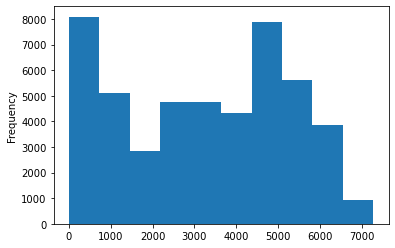

In [5]:
import matplotlib.pyplot as plt

Metro["traffic_volume"].plot.hist()

In [6]:
Metro["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the above we are able to see about 25 % (1193) cars are passing by the station (this might be night time or raod under construction) hour and we can also see that about 75%(4933) cars or below are passing by the station each hour From this we can say night and day time is making a differnce in traffic so we going to divide the night and day time data into two datasets

In [7]:
Metro["date_time"]=pd.to_datetime(Metro["date_time"]) # converted string to datetime object

In [8]:
Metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [9]:
Metro["hour"]=Metro["date_time"].dt.hour

We'll start by dividing the dataset into two parts: Daytime data: hours from 7 a.m. to 7 p.m. (12 hours) Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [10]:
t=(Metro["hour"]>=7)&(Metro["hour"]<19)
daytime=Metro[t]
n=(Metro["hour"]>=19)|(Metro["hour"]<7)
nightime=Metro[n]


In [11]:
nightime.shape

(24327, 10)

In [12]:
daytime.shape

(23877, 10)

In [13]:
Metro.shape

(48204, 10)

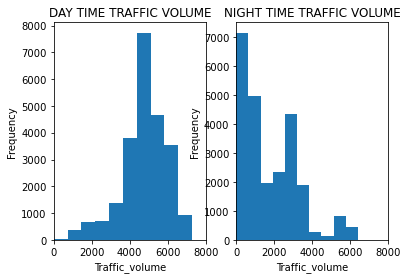

In [14]:
plt.figure()
plt.subplot(1,2,1)
daytime["traffic_volume"].plot.hist()
plt.xlim(0,8000)
plt.title("DAY TIME TRAFFIC VOLUME")
plt.xlabel("Traffic_volume")
plt.subplot(1,2,2)
nightime["traffic_volume"].plot.hist()
plt.xlim(0,8000)
plt.title("NIGHT TIME TRAFFIC VOLUME")
plt.xlabel("Traffic_volume")
plt.show()

In [15]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
nightime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

# Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

In [19]:
daytime["month"]=daytime["date_time"].dt.month
months=daytime.groupby("month").mean()

C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/880160857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["month"]=daytime["date_time"].dt.month


In [20]:
months["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'frequency of traffic for each month')

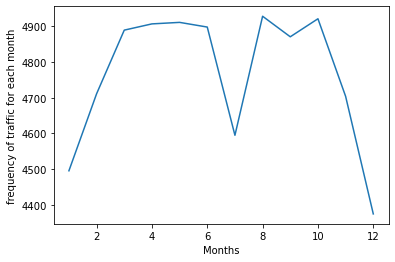

In [21]:
months["traffic_volume"].plot.line()
plt.xlabel("Months")
plt.ylabel("frequency of traffic for each month")

Traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/4264572644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["year"]=daytime["date_time"].dt.year


<AxesSubplot:xlabel='year'>

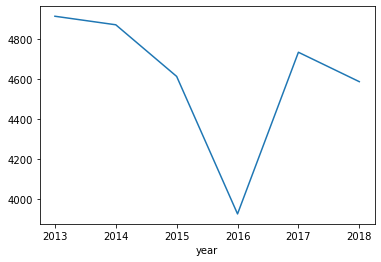

In [22]:
daytime["year"]=daytime["date_time"].dt.year
july=daytime[daytime["month"]==7]
x=july.groupby("year").mean()
x["traffic_volume"].plot.line()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction



Now we will see line plots for another time unit: day of the week.

C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/469222354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["dayofweek"]=daytime["date_time"].dt.dayofweek


<AxesSubplot:xlabel='dayofweek'>

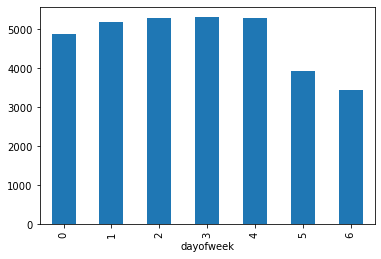

In [23]:
daytime["dayofweek"]=daytime["date_time"].dt.dayofweek
x=daytime.groupby("dayofweek").mean()
x["traffic_volume"].plot.bar()

In [24]:
x["traffic_volume"]

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

we can say that have different traffics in weekends and weekdays, so we going to separate weekends and weekdays

In [26]:
weekdays=daytime[daytime["dayofweek"]<=4]
weekends=daytime[daytime["dayofweek"]>=5]

Now we will are going to check the traffic_volume for different hours of a day for weekends and weekdays

Text(0.5, 1.0, 'weekends traffic')

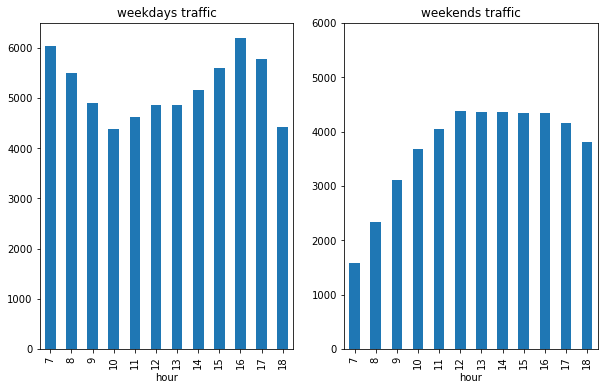

In [27]:
weekdays_by_hour=weekdays.groupby("hour").mean()
weekends_by_hour=weekends.groupby("hour").mean()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
weekdays_by_hour["traffic_volume"].plot.bar()
plt.title("weekdays traffic")
plt.subplot(1,2,2)
weekends_by_hour["traffic_volume"].plot.bar(ylim=(0,6000))
plt.title("weekends traffic")

On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather.

In [28]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   hour                 23877 non-null  int64         
 10  month                23877 non-null  int64         
 11  year                 23877 non-null  int64         
 12  dayofweek            23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [29]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Temparature has highest positive correlation with traffic_volume so we will plot a line grap with temparature and traffic_volume (numeric weather columns)

(230.0, 330.0)

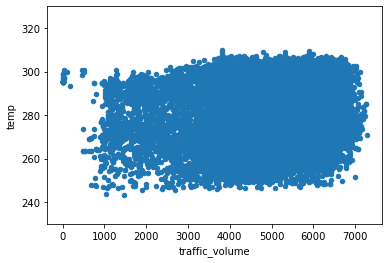

In [31]:
daytime.plot.scatter(y="temp",x="traffic_volume")
plt.ylim(230,330)

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.



Let's now look at the other weather-related columns: weather_main and weather_description.

In [32]:
weather_main=daytime.groupby("weather_main").mean()
weather_des=daytime.groupby("weather_description").mean()

Text(0.5, 1.0, 'weather_description')

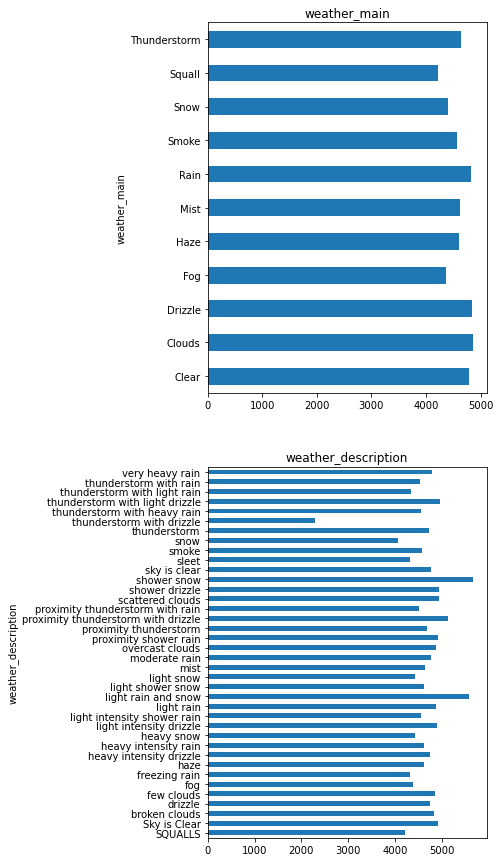

In [33]:
plt.figure(figsize=(5,15))
plt.subplot(2,1,1)
weather_main["traffic_volume"].plot.barh()
plt.title("weather_main")
plt.subplot(2,1,2)
weather_des["traffic_volume"].plot.barh()
plt.title("weather_description")


In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

The traffic is usually heavier on business days compared to the weekends.

On business days, the rush hours are around 7 and 16.
Weather indicators:

Shower snow

Light rain and snow

Proximity thunderstorm with drizzle

# Now we will see these factors for night data also which effects traffic

In [34]:
nightime["month"]=nightime["date_time"].dt.month
nightime["year"]=nightime["date_time"].dt.year
nightime["hour"]=nightime["date_time"].dt.hour
nightime["dayofweek"]=nightime["date_time"].dt.dayofweek

C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/2231434588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nightime["month"]=nightime["date_time"].dt.month
C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/2231434588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nightime["year"]=nightime["date_time"].dt.year
C:\Users\POORNI~1\AppData\Local\Temp/ipykernel_16272/2231434588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Text(0.5, 1.0, 'Traffic for each month')

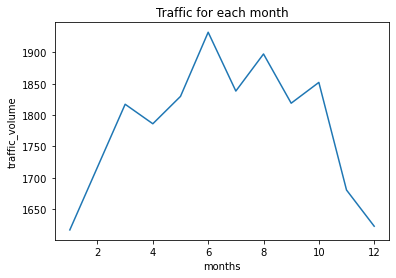

In [35]:
nightime.groupby("month").mean()["traffic_volume"].plot.line()
plt.ylabel("traffic_volume")
plt.xlabel("months")
plt.title("Traffic for each month")

<AxesSubplot:xlabel='year'>

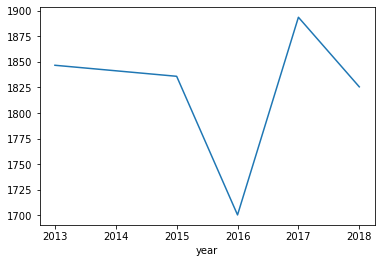

In [36]:
n=nightime[nightime["month"]==9]
n.groupby("year").mean()["traffic_volume"].plot.line()

only in the year 2016 the traffic less may be beacause of road construction because of this the traffic volume changed in all the months of 2016 so average is decreased compared to the original

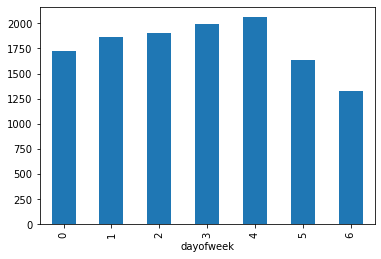

In [38]:
dayofweek=nightime.groupby("dayofweek").mean()["traffic_volume"].plot.bar()

Traffic is less in weekends so we will divide the data into weekdays and weekeends and compare that with timings

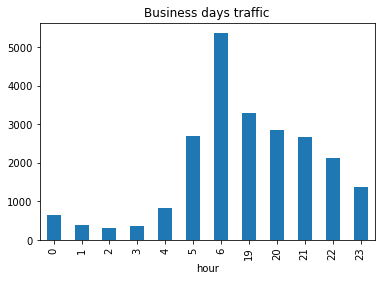

(0.0, 5000.0)

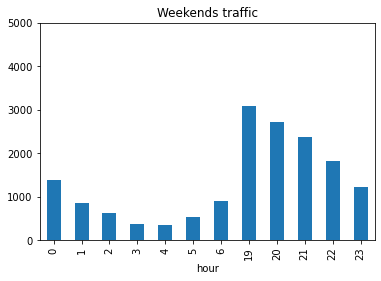

In [40]:
weekday=nightime[nightime["dayofweek"]<=4]
weekend=nightime[nightime["dayofweek"]>5]
weekday.groupby("hour").mean()["traffic_volume"].plot.bar()
plt.title("Business days traffic")
plt.show()
weekend.groupby("hour").mean()["traffic_volume"].plot.bar()
plt.title("Weekends traffic")
plt.ylim(0,5000)

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

The traffic is usually heavier on business days compared to the weekends.

On business days, the rush hours are around 6 and 19



Weather indicators

In [41]:
nightime.corr()["traffic_volume"]

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
hour              0.454586
month             0.001342
year              0.018544
dayofweek        -0.073636
Name: traffic_volume, dtype: float64

(0.0, 30.0)

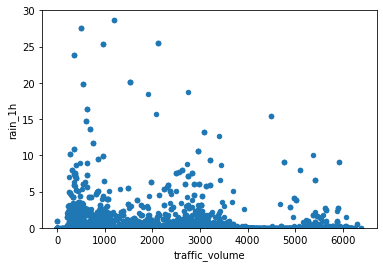

In [42]:
nightime.plot.scatter(y="rain_1h",x="traffic_volume")
plt.ylim(0,30)

This is not showing any correlation so we will now see for categorial columns

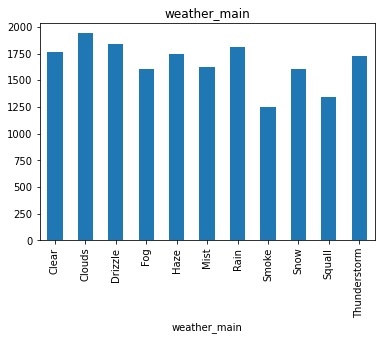

Text(0.5, 1.0, 'weather_description')

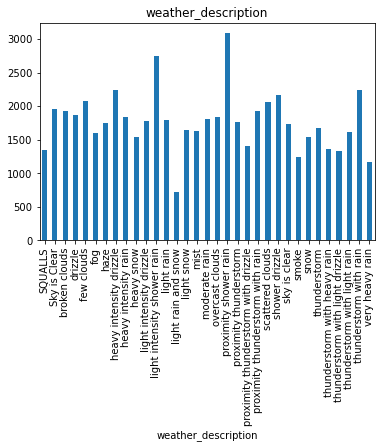

In [43]:
nightime.groupby("weather_main").mean()["traffic_volume"].plot.bar()
plt.title("weather_main")
plt.show()
nightime.groupby("weather_description").mean()["traffic_volume"].plot.bar()
plt.title("weather_description")

Weather indicators:Proximity shower rain,Light intensity shower rain,Thunderstrom with rain

# Final concustion for night data

Time indicator:

The traffic is usually heavier during warm months (March–October)    compared to cold months (November–February).

The traffic is usually heavier on business days compared to the weekends.

On business days, the rush hours are around 6 and 19

Weather indicators:

Proximity shower rain

Light intensity shower rain

Thunderstrom with rain